### Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

**When should it be used?**

It assumes that the data are missing completely at random(MCAR)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("titanic.csv",usecols=["Age","Fare","Survived"])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isna().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df.isna().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [6]:
df["Age"].isna().sum()

177

In [7]:
df["Age"].dropna().sample()

693    25.0
Name: Age, dtype: float64

In [8]:
df["Age"].dropna().sample(df["Age"].isna().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [9]:
def impute_nan(df,variable,median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    random_sample = df["Age"].dropna().sample(df["Age"].isna().sum())
    random_sample.index = df[df[variable].isna()].index
    df.loc[df[variable].isna(),variable+"_random"] = random_sample

In [10]:
median = df["Age"].median()

In [11]:
impute_nan(df,"Age",median)

In [12]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [13]:
df.isna().sum()

Survived        0
Age           177
Fare            0
Age_median      0
Age_random      0
dtype: int64

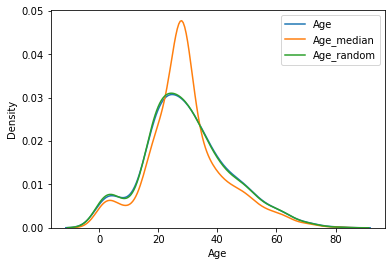

In [14]:
sns.kdeplot(df["Age"],label="Age")
sns.kdeplot(df["Age_median"],label="Age_median")
sns.kdeplot(df["Age_random"],label="Age_random")
plt.legend()

### Advantages And Disadvantages of Random Sample Imputation

**Advantages**
- Easy To implement
- There is less distortion in variance

**Disadvantages**
- Every situation randomness wont work

### Capturing NAN values with a new feature
It works well if the data are not missing completely at random

In [15]:
df = pd.read_csv("titanic.csv",usecols=["Age","Fare","Survived"])

In [16]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [17]:
df["Age_na"] = np.where(df["Age"].isna(),1,0)

In [18]:
df.head(10)

,Survived,Age,Fare,Age_na
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [19]:
df["Age"].median()

28.0

In [20]:
df["Age"].fillna(df["Age"].median(),inplace=True)

In [21]:
df.isna().sum()

Survived    0
Age         0
Fare        0
Age_na      0
dtype: int64

In [22]:
df.head(10)

,Survived,Age,Fare,Age_na
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


### Advantages And Disadvantages of Capturing NAN values with a new feature

**Advantages**
- Easy to implement
- Captures the importance of missing values

**Disadvantages**
- Creating Additional Features(Curse of Dimensionality)

### End of Distribution imputation
- It works well if the data are not missing completely at random
- If the variable is normally distributed, we can use the mean plus or minus 3 times the standard deviation.
- If the variable is skewed, we can use the IQR proximity rule.
- Suitable numerical variables.


In [23]:
df = pd.read_csv("titanic.csv",usecols=["Age","Fare","Survived"])

In [24]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

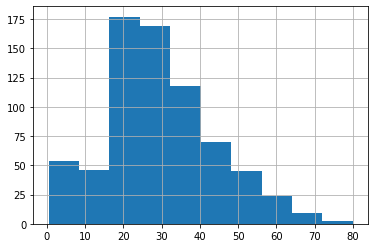

In [25]:
df["Age"].hist()

C:\Users\saura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

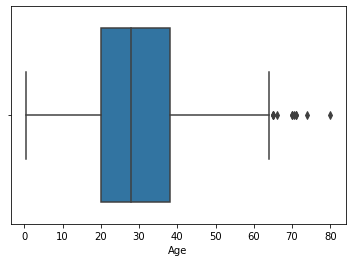

In [26]:
sns.boxplot(df["Age"])

In [27]:
median = df["Age"].median()
extreme = df["Age"].mean() + 3* df["Age"].std()

In [28]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"] = df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [29]:
impute_nan(df,"Age",median,extreme)

In [30]:
df.isna().sum()

Survived                0
Age                     0
Fare                    0
Age_end_distribution    0
dtype: int64

In [31]:
df.head(10)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<AxesSubplot:>

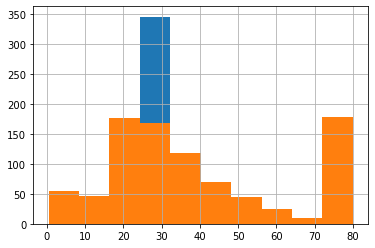

In [32]:
df["Age"].hist()
df["Age_end_distribution"].hist()

C:\Users\saura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

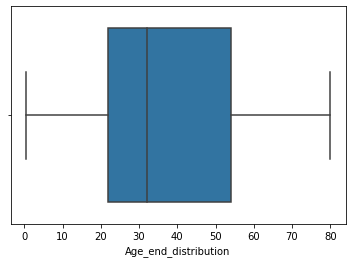

In [33]:
sns.boxplot(df["Age_end_distribution"])

### Advantages And Disadvantages of End of Distribution imputation

**Advantages:**

- Easy to implement
- Fast way of obtaining complete datasets
- Can be integrated into production (during model deployment)
- Captures the importance of “missingness” if there is one

**Disadvantages:**

- Distortion of the original variable distribution
- Distortion of the original variance
- Distortion of the covariance with the remaining variables of the dataset
- This technique may mask true outliers in the distribution